In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

In [2]:
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_palette('muted')
sns.set_color_codes('muted')

In [5]:
## Desktop
filepath = '/Users/frankanayet/Google Drive/NLineData/Beh_Data/Replication'
os.chdir(filepath)

In [6]:
print 'Pandas version ' + pd.__version__

Pandas version 0.17.1


In [7]:
new_df = pd.read_csv('nline_data_rep.csv',sep='\t')

In [8]:
new_df.catch.unique()

array([  0.,   1.,  nan])

In [9]:
len(new_df)

6912

In [10]:
new_df.loc[:,:]= new_df[new_df['catch']<1]
#len(nline_miss)
new_df['Missed'] = new_df['Error']
new_df.loc[new_df['Missed']<1,'Missed'] = 0
#Pick only responded trials
new_df.loc[:,:] = new_df[new_df['Missed']==0]

In [11]:
new_df = new_df[pd.notnull(new_df['Subject'])]

In [12]:
len(new_df)

4914

In [13]:
new_df.loc[:,'AbsError'] = np.abs(new_df['Error'])

In [14]:
new_df['BigError'] = 0
new_df.loc[new_df['AbsError']>0.15,'BigError'] = 1
new_df['BigError'].sum()

61

In [15]:
new_df.loc[:,'Task'] = new_df['Task'].replace([1,2,3],['N+', 'N-/+', 'Word'])

In [16]:
new_df.Task

0       Word
2       Word
3       Word
6       Word
7       Word
8       Word
9       Word
10      Word
11      Word
12      Word
14      Word
15      Word
18        N+
20        N+
21        N+
22        N+
23        N+
24        N+
25        N+
26        N+
27        N+
28        N+
29        N+
31        N+
32      N-/+
33      N-/+
34      N-/+
36      N-/+
37      N-/+
38      N-/+
        ... 
6863    N-/+
6866      N+
6868      N+
6871      N+
6874      N+
6875      N+
6880    N-/+
6881    N-/+
6882    N-/+
6883    N-/+
6885    N-/+
6888    N-/+
6889    N-/+
6891    N-/+
6892    N-/+
6893    N-/+
6894    N-/+
6895    N-/+
6897    Word
6898    Word
6899    Word
6900    Word
6901    Word
6902    Word
6904    Word
6905    Word
6907    Word
6908    Word
6909    Word
6911    Word
Name: Task, dtype: object

In [17]:
pal = sns.color_palette()

In [18]:
new_df = new_df.sort_values(by='Line_pct')

In [19]:
np.sort(new_df.Subject.unique())

array(['s_04101', 's_04102', 's_04103', 's_04105', 's_04106', 's_04107',
       's_04108', 's_04109', 's_04110', 's_04111', 's_04112', 's_04113',
       's_04114', 's_04115', 's_04118', 's_04119', 's_04120', 's_04201',
       's_04202', 's_04203', 's_04204', 's_04205', 's_04206', 's_04207',
       's_04209', 's_04210', 's_04211', 's_04212', 's_04213', 's_04214',
       's_04215', 's_04216', 's_04217', 's_04218', 's_04219', 's_04220'], dtype=object)

In [20]:
#new_df.loc[:,:] = new_df[new_df['Subject']!='s_04116']

In [21]:
#df.loc[:,:] = new_df[new_df['Subject']!='s_04117']

In [22]:
#df.loc[:,:] = new_df[new_df['Subject']!='s_04104']

In [23]:
#new_df = new_df[pd.notnull(new_df['Subject'])]

In [24]:
len(new_df)

4914

In [25]:
np.sort(new_df.Subject.unique())

array(['s_04101', 's_04102', 's_04103', 's_04105', 's_04106', 's_04107',
       's_04108', 's_04109', 's_04110', 's_04111', 's_04112', 's_04113',
       's_04114', 's_04115', 's_04118', 's_04119', 's_04120', 's_04201',
       's_04202', 's_04203', 's_04204', 's_04205', 's_04206', 's_04207',
       's_04209', 's_04210', 's_04211', 's_04212', 's_04213', 's_04214',
       's_04215', 's_04216', 's_04217', 's_04218', 's_04219', 's_04220'], dtype=object)

In [29]:
plt_df = new_df.copy()
plt_df = plt_df.groupby(['Task','Line_pct','Subject']).mean()
plt_df.to_csv('plot_data_rep.csv', sep='\t')
plt_df = pd.read_csv('plot_data_rep.csv',sep='\t')

## RT boxplots

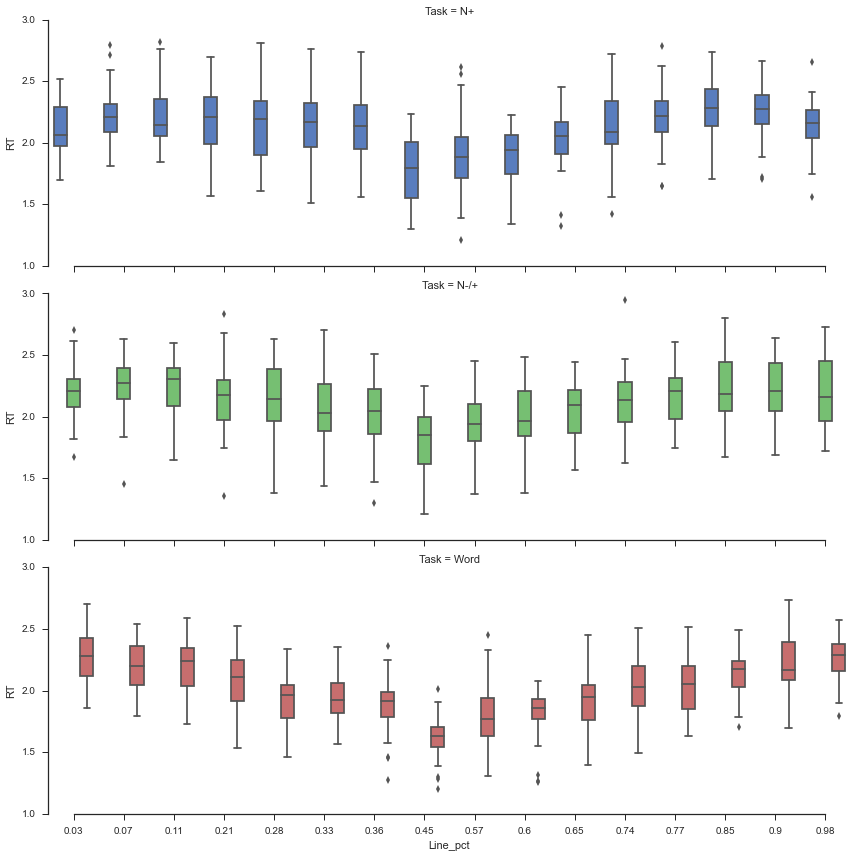

In [27]:
ax = sns.factorplot(x='Line_pct',y='RT',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3)
sns.despine(trim=True)

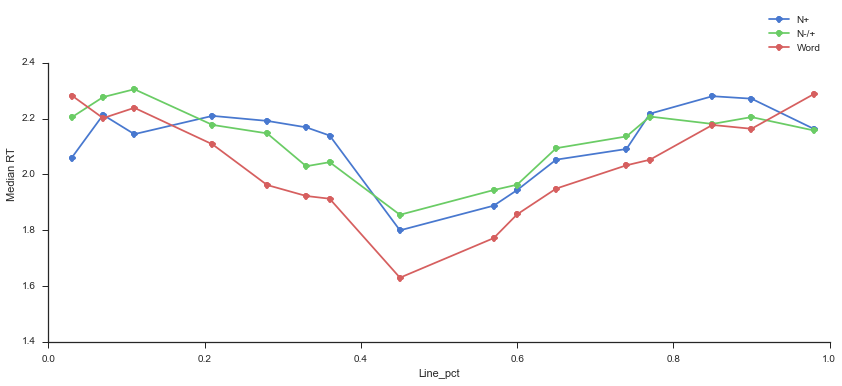

In [28]:
plt.figure(figsize=(14,6))
for key,grp in plt_df.groupby('Task'):
    print 
    plt.plot(grp.Line_pct.unique(),grp.groupby('Line_pct')['RT'].median(),'-o',label=key)
plt.legend(loc = 'best')
plt.ylim([1.4,2.6])
plt.xlabel('Line_pct')
plt.ylabel('Median RT')
sns.despine(trim=True)

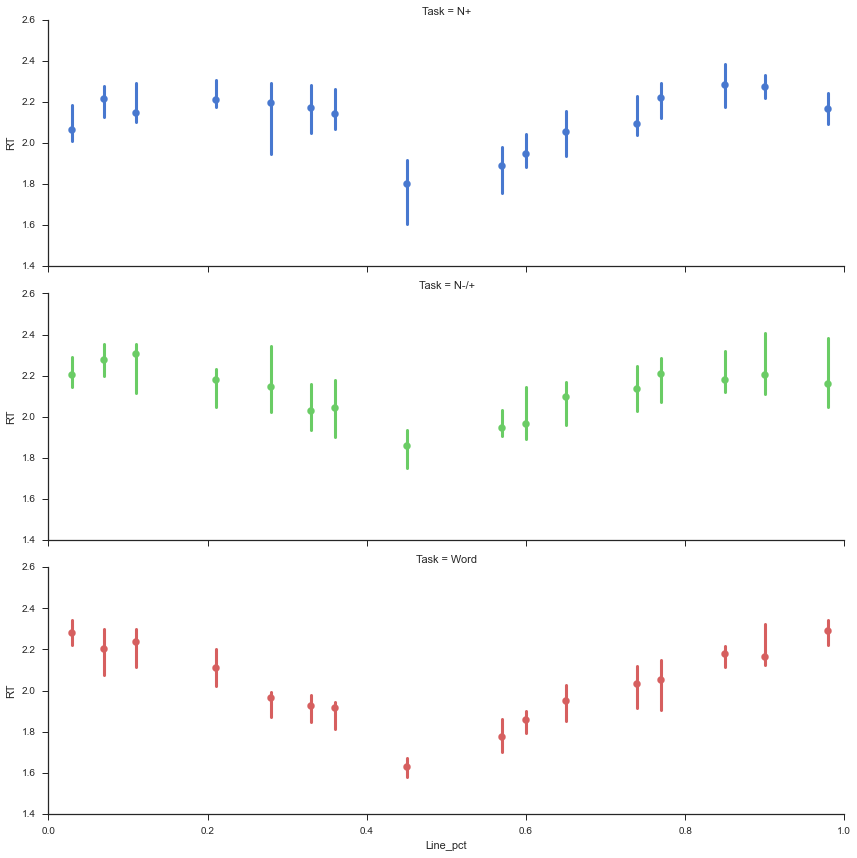

In [46]:
g = sns.FacetGrid(plt_df, row='Task', hue='Task',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'Line_pct', 'RT', fit_reg=False,x_estimator=np.median).set(xlim=(0,1))
sns.despine(trim=True)

In [67]:
len(plt_df.loc[plt_df['Task']=='N+','RT'].get_values() - plt_df.loc[plt_df['Task']=='Word','RT'].get_values())

576

Subtraction is being calculates as 1. Take mean for each subject on each position(3 values),then subtract from each (subject,value) pair in the N+ task the value from the same (subject,value) pair in the word task. Then take the median of the result.

In [60]:
plt_df.loc[plt_df['Task']=='N+','RT-'] = plt_df.loc[plt_df['Task']=='N+','RT'].get_values() - plt_df.loc[plt_df['Task']=='Word','RT'].get_values()

In [61]:
plt_df.loc[plt_df['Task']=='N-/+','RT-'] = plt_df.loc[plt_df['Task']=='N-/+','RT'].get_values() - plt_df.loc[plt_df['Task']=='Word','RT'].get_values()

In [64]:
plt_df.loc[plt_df['Task']=='N+',['RT','Word']].head(15)

,RT,Word
0,2.207186,NaN
1,2.477834,NaN
2,1.776985,NaN
3,2.194051,NaN
4,2.309788,NaN
5,2.425818,NaN
6,2.288520,NaN
7,2.026878,NaN
8,2.109435,NaN
9,1.988298,NaN


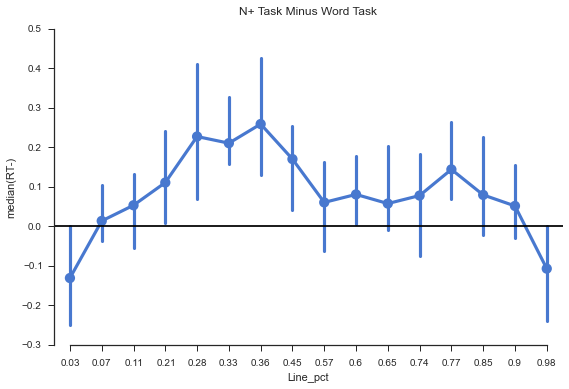

In [65]:
ax = sns.pointplot(x=plt_df.loc[plt_df['Task']=='N+','Line_pct'],y=plt_df.loc[plt_df['Task']=='N+','RT-'],estimator=np.median,size=4,aspect=3)
plt.axhline(y=0, color='black')
plt.title('N+ Task Minus Word Task', y=1.03)
sns.despine(trim=True)
plt.tight_layout()

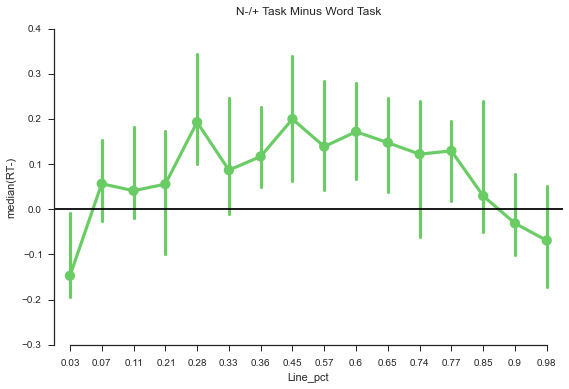

In [66]:
ax = sns.pointplot(x=plt_df.loc[plt_df['Task']=='N-/+','Line_pct'],y=plt_df.loc[plt_df['Task']=='N-/+','RT-'],estimator=np.median,size=4,aspect=3,color=pal[1])
plt.axhline(y=0, color='black')
plt.title('N-/+ Task Minus Word Task',y=1.03)
sns.despine(trim=True)
plt.tight_layout()

# MAE boxplots

With means for each subject

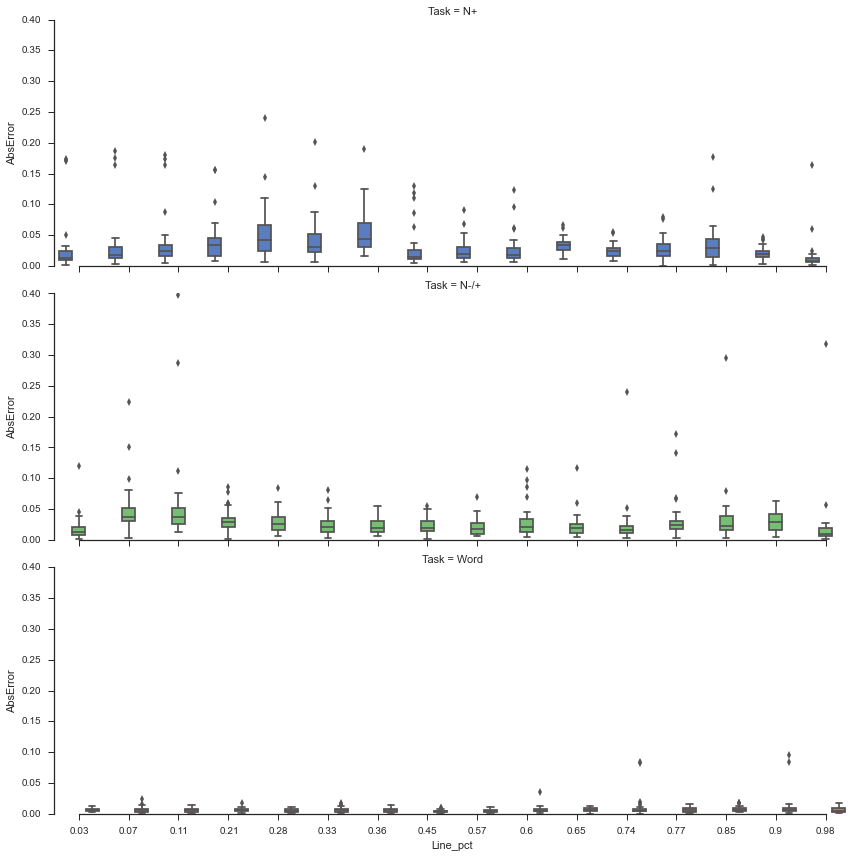

In [68]:
ax = sns.factorplot(x='Line_pct',y='AbsError',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3)
sns.despine(trim=True)

Y axis different to see details on all plots

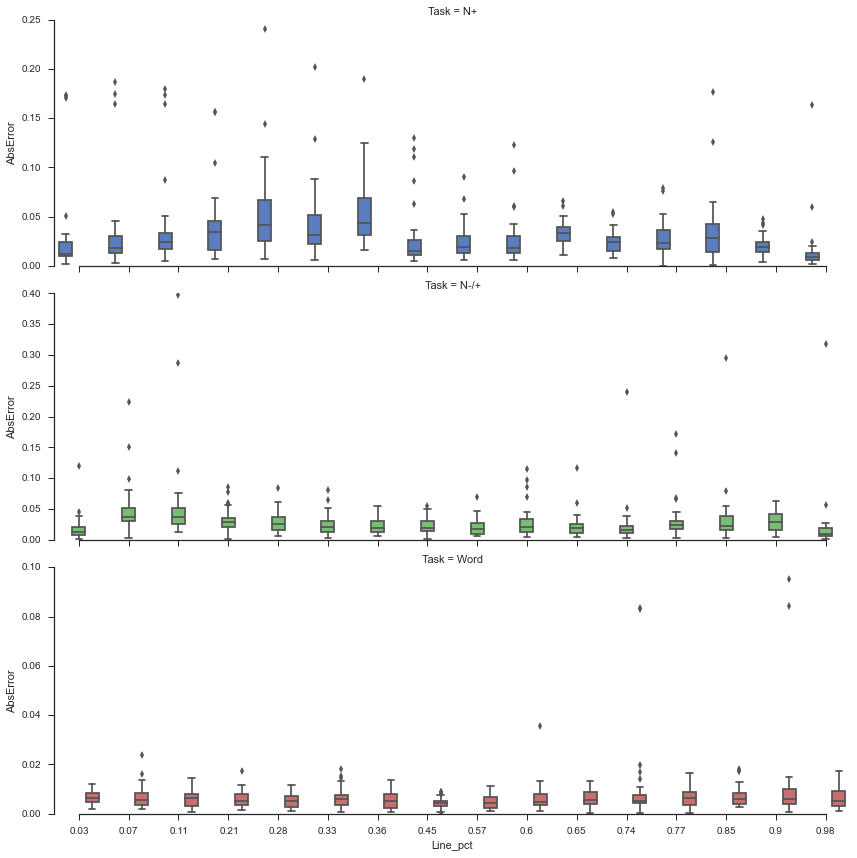

In [69]:
ax = sns.factorplot(x='Line_pct',y='AbsError',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3,sharey=False)
sns.despine(trim=True)

In [70]:
median_df = new_df.copy()

In [71]:
median_df = median_df.groupby(['Task','Line_pct','Subject']).median()

In [72]:
median_df.to_csv('plot_data_median_rep.csv', sep='\t')

In [74]:
median_df = pd.read_csv('plot_data_median_rep.csv',sep='\t')

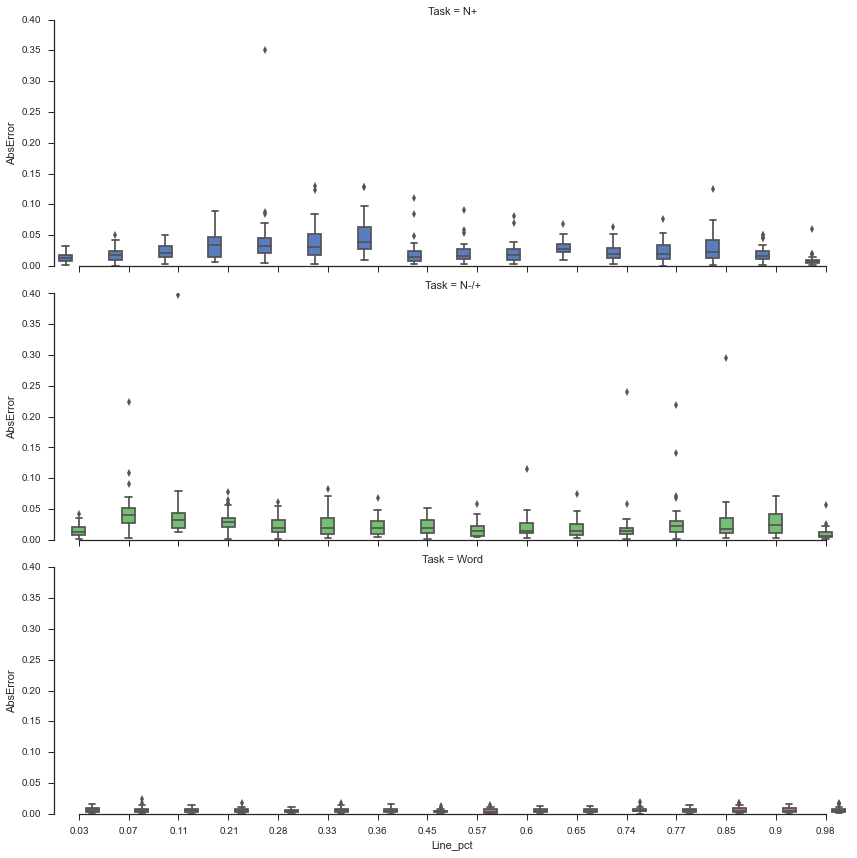

In [75]:
ax = sns.factorplot(x='Line_pct',y='AbsError',hue='Task',row='Task',data=median_df,kind='box',size=4,aspect=3)
sns.despine(trim=True)

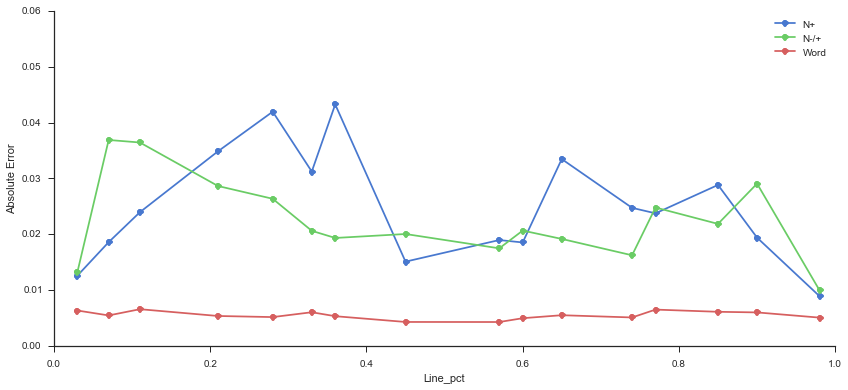

In [80]:
plt.figure(figsize=(14,6))
for key,grp in plt_df.groupby('Task'):
    print 
    plt.plot(grp.Line_pct.unique(),grp.groupby('Line_pct')['AbsError'].median(),'-o',label=key)
plt.legend(loc = 'best')
plt.ylim([0,0.06])
plt.xlabel('Line_pct')
plt.ylabel('Absolute Error')
sns.despine(trim=True)

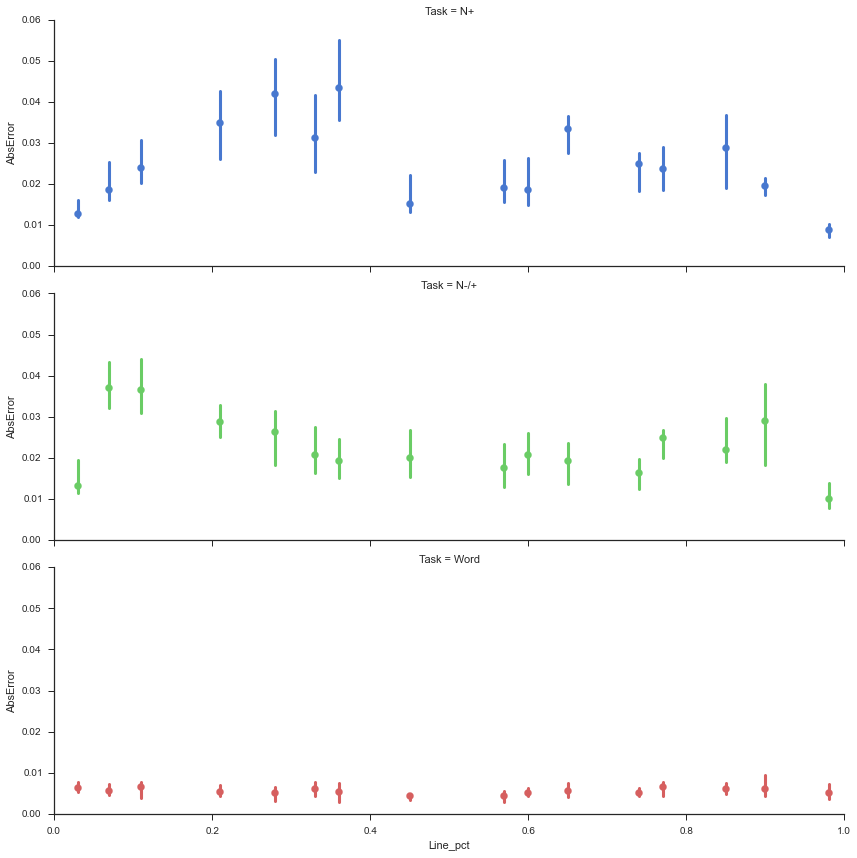

In [81]:
g = sns.FacetGrid(plt_df, row='Task',hue='Task',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'Line_pct', 'AbsError', fit_reg=False,x_estimator=np.median).set(xlim=(0,1))
sns.despine(trim=True)

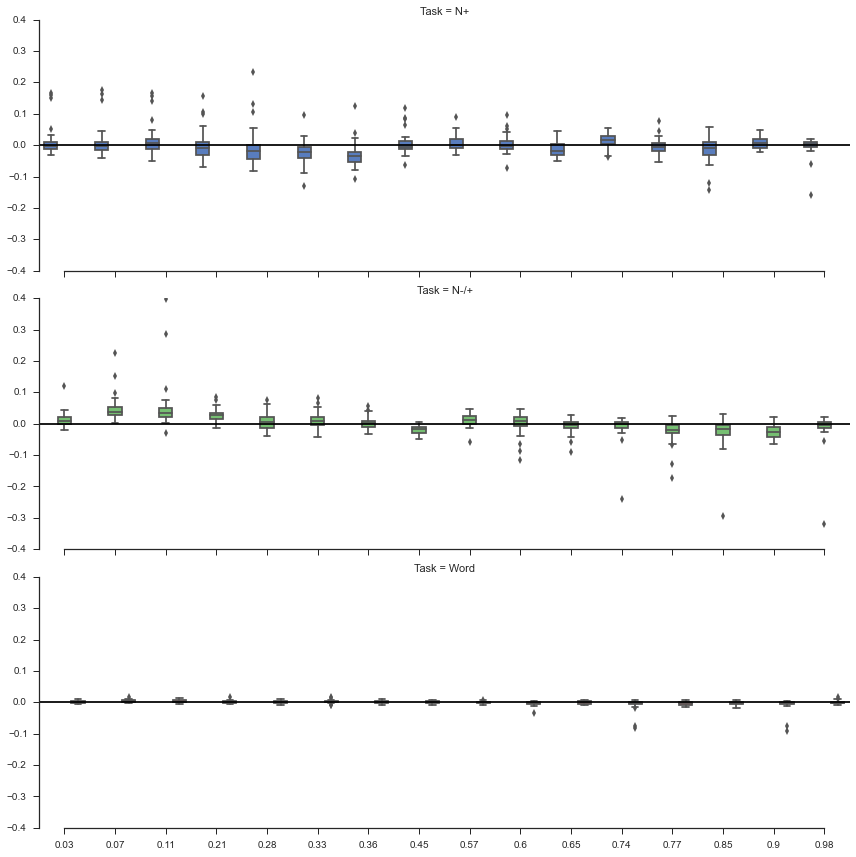

In [82]:
ax = sns.factorplot(x='Line_pct',y='Error',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3,sharey=True)
sns.despine(trim=True)
ax.map(plt.axhline, y=0, color='black')

## Remove Big Errors

In [83]:
plt_df = new_df.copy()

In [84]:
len(plt_df)

4914

In [87]:
plt_df = plt_df[plt_df['BigError']==0]

In [88]:
len(plt_df)

4853

In [89]:
plt_df.BigError.unique()

array([0])

In [90]:
plt_df = plt_df.groupby(['Task','Line_pct','Subject']).mean()
plt_df.to_csv('plot_data.csv', sep='\t')
plt_df = pd.read_csv('plot_data.csv',sep='\t')

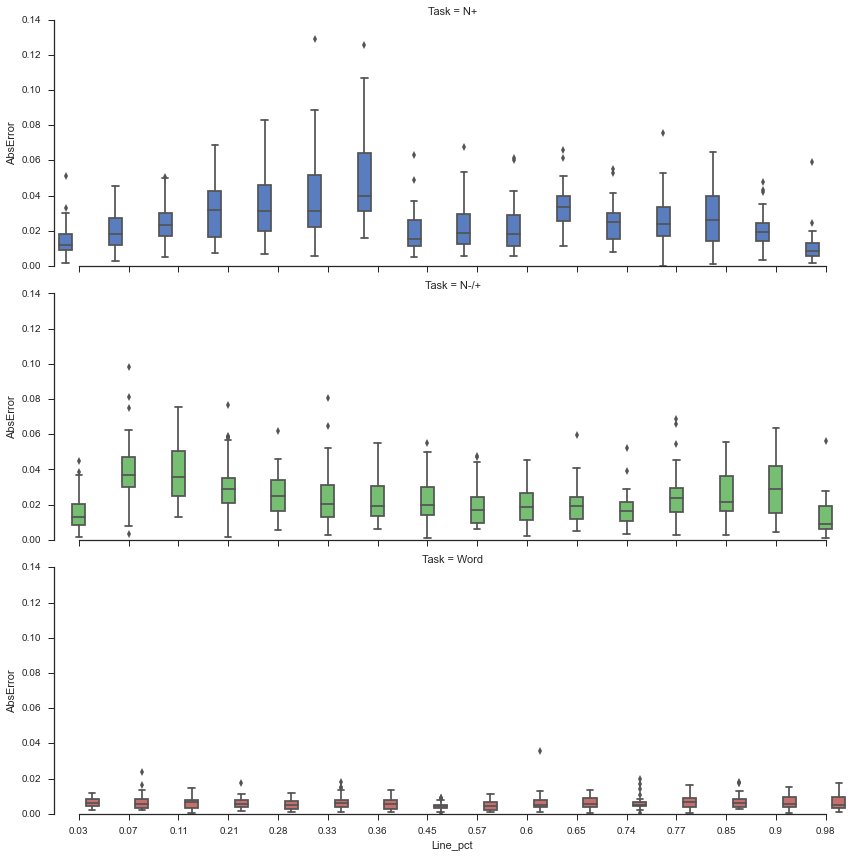

In [91]:
ax = sns.factorplot(x='Line_pct',y='AbsError',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3,sharey=True)
sns.despine(trim=True)

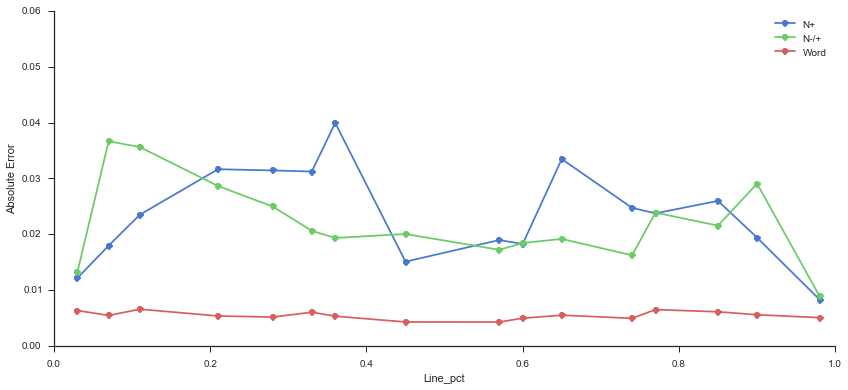

In [92]:
plt.figure(figsize=(14,6))
for key,grp in plt_df.groupby('Task'):
    print 
    plt.plot(grp.Line_pct.unique(),grp.groupby('Line_pct')['AbsError'].median(),'-o',label=key)
plt.legend(loc = 'best')
plt.ylim([0,0.06])
plt.xlabel('Line_pct')
plt.ylabel('Absolute Error')
sns.despine(trim=True)

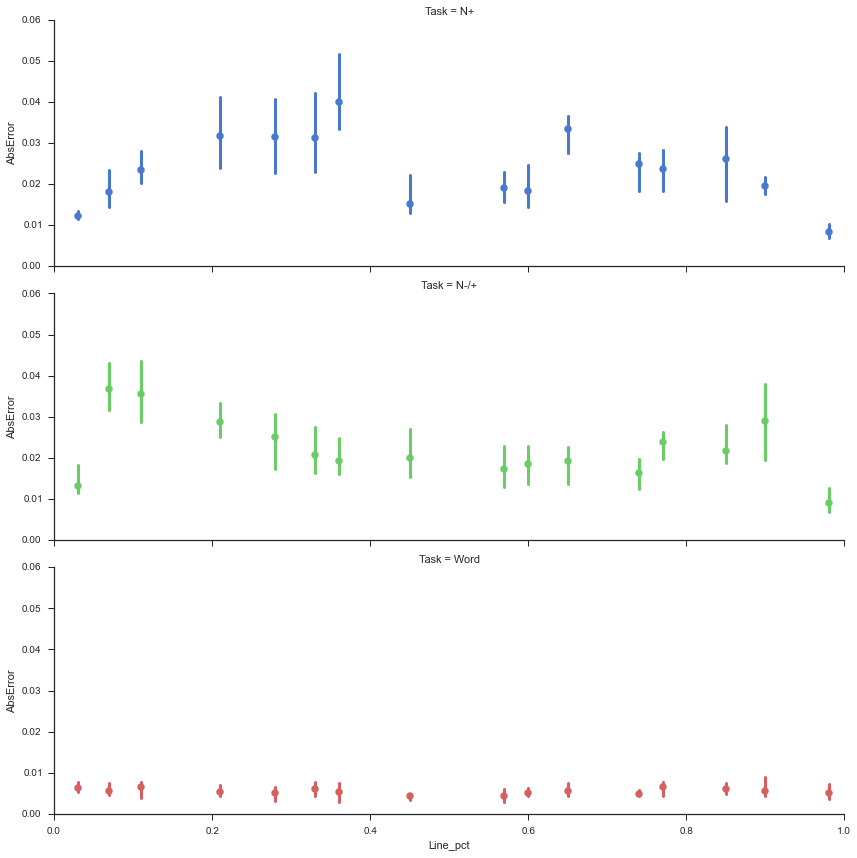

In [93]:
g = sns.FacetGrid(plt_df, row='Task',hue='Task',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'Line_pct', 'AbsError', fit_reg=False,x_estimator=np.median).set(xlim=(0,1))
sns.despine(trim=True)

## Signed Error boxplot

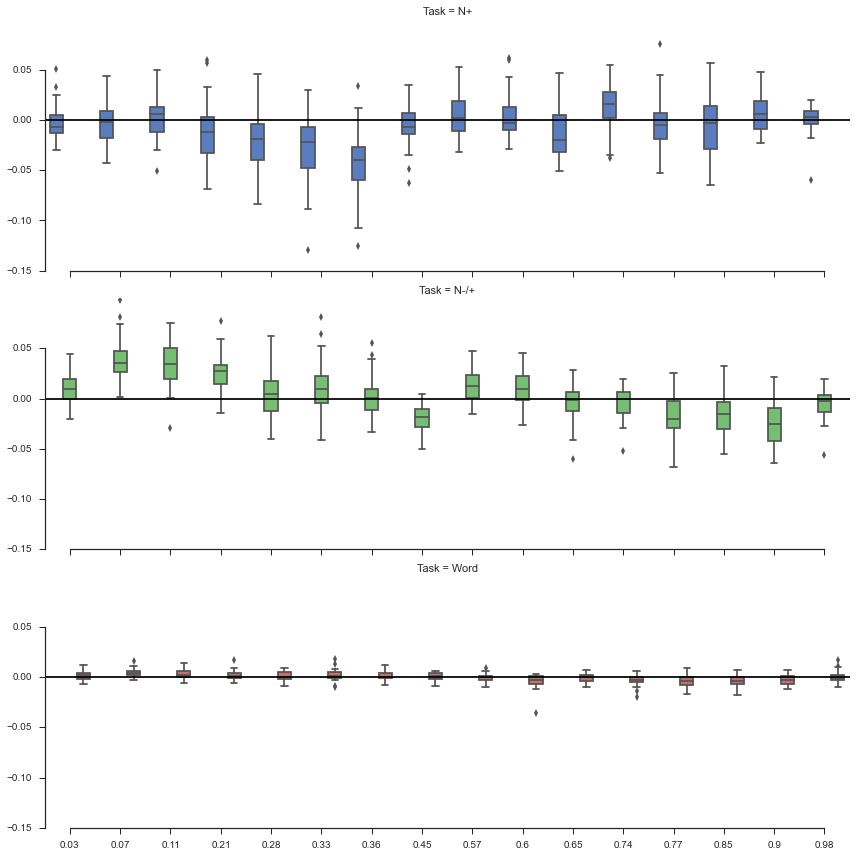

In [94]:
ax = sns.factorplot(x='Line_pct',y='Error',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3,sharey=True)
sns.despine(trim=True)
ax.map(plt.axhline, y=0, color='black')

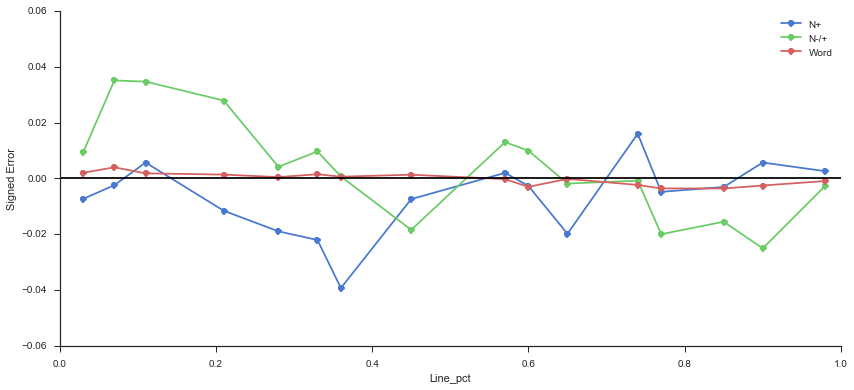

In [95]:
plt.figure(figsize=(14,6))
for key,grp in plt_df.groupby('Task'):
    print 
    plt.plot(grp.Line_pct.unique(),grp.groupby('Line_pct')['Error'].median(),'-o',label=key)
plt.axhline(y=0,color='black')
plt.legend(loc = 'best')
plt.ylim([-.06,0.06])
plt.xlabel('Line_pct')
plt.ylabel('Signed Error')
sns.despine(trim=True)

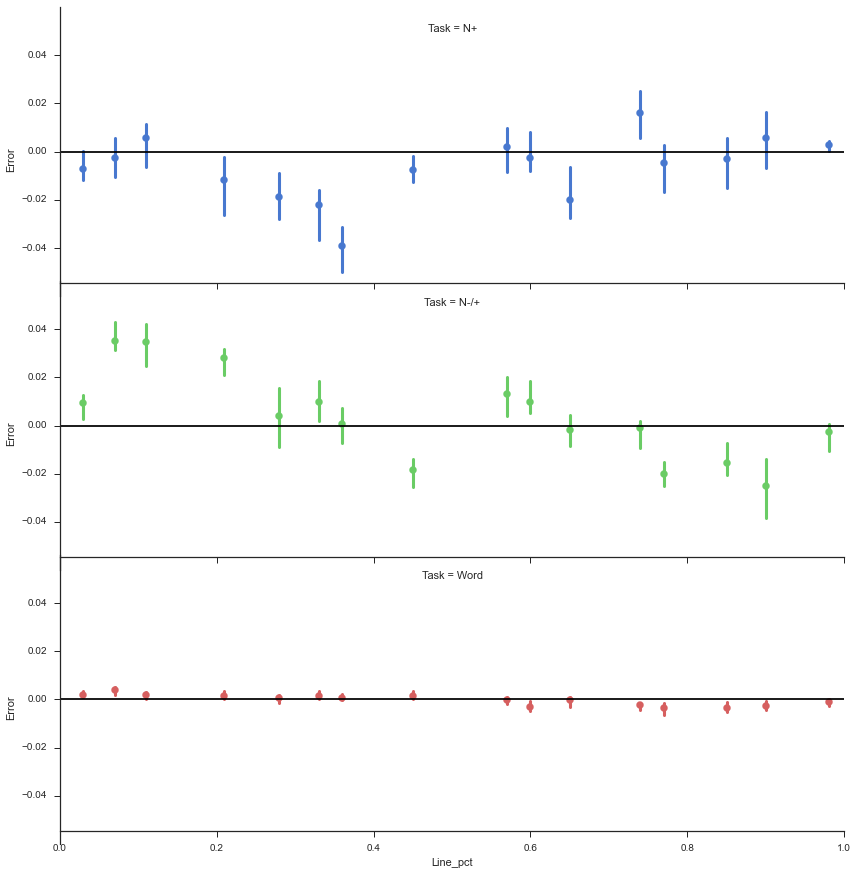

In [96]:
g = sns.FacetGrid(plt_df, row='Task',hue='Task',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'Line_pct', 'Error', fit_reg=False,x_estimator=np.median).set(xlim=(0,1))
sns.despine(trim=True)
for ax in g.axes.flat:
    ax.plot((0,1),(0,0),c='black')

## SD boxplot

In [98]:
sd_df = new_df.copy()

In [100]:
sd_df = sd_df[sd_df['BigError']==0]

In [101]:
len(sd_df)

4853

In [102]:
sd_df = sd_df.groupby(['Task','Line_pct','Subject']).std()

In [103]:
sd_df.to_csv('plot_data_SD.csv', sep='\t')
sd_df = pd.read_csv('plot_data_SD.csv',sep='\t')

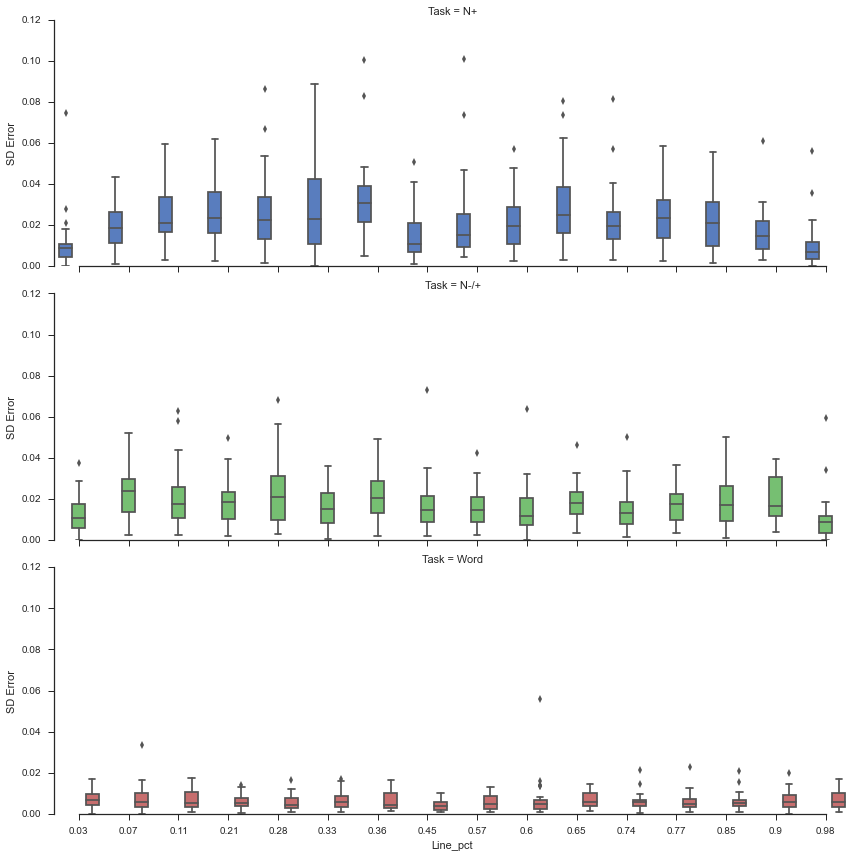

In [104]:
ax = sns.factorplot(x='Line_pct',y='Error',hue='Task',row='Task',data=sd_df,kind='box',size=4,aspect=3,sharey=True)
sns.despine(trim=True)
(ax.set_axis_labels("Line_pct",'SD Error'))

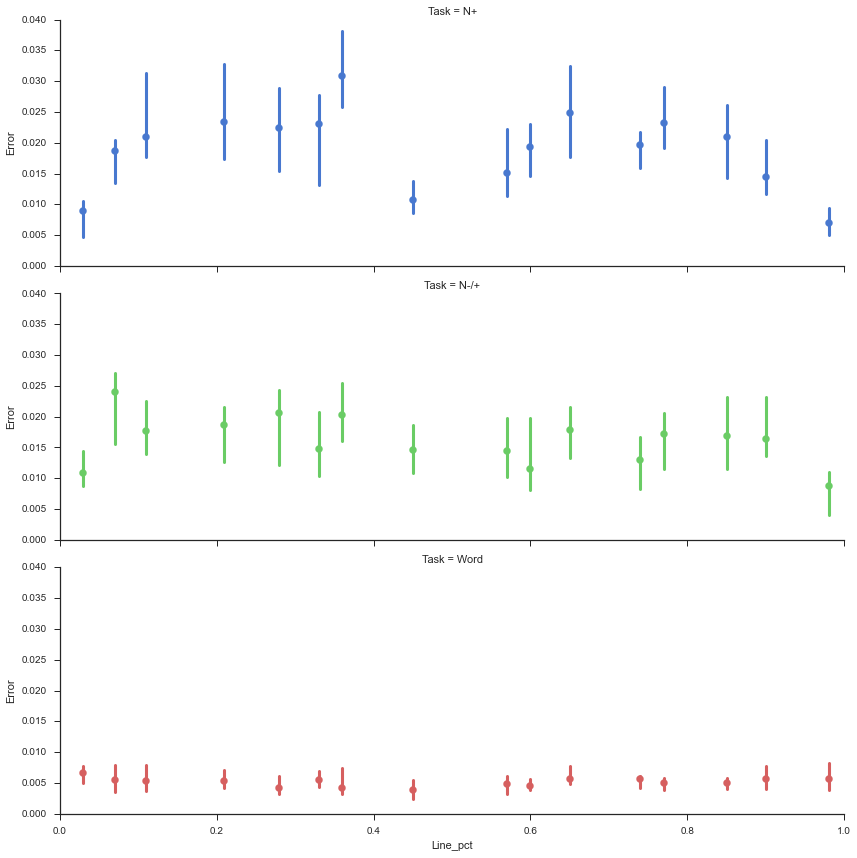

In [128]:
g = sns.FacetGrid(sd_df,hue='Task', row= 'Task', palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'Line_pct', 'Error', fit_reg=False,x_estimator=np.median).set(xlim=(0,1))
sns.despine(trim=True)

## SD vs Median placement instead of Correct Placement

In [106]:
median_scores = plt_df.groupby(['Task', 'Line_pct'])['Response'].median()

In [107]:
median_scores

Task  Line_pct
N+    0.03        0.022636
      0.07        0.067552
      0.11        0.115666
      0.21        0.198382
      0.28        0.261016
      0.33        0.307901
      0.36        0.320682
      0.45        0.442570
      0.57        0.571965
      0.60        0.597283
      0.65        0.630136
      0.74        0.755998
      0.77        0.765161
      0.85        0.846909
      0.90        0.905667
      0.98        0.982568
N-/+  0.03        0.039286
      0.07        0.105087
      0.11        0.144686
      0.21        0.237891
      0.28        0.284142
      0.33        0.339635
      0.36        0.360673
      0.45        0.431541
      0.57        0.582956
      0.60        0.609932
      0.65        0.648135
      0.74        0.739167
      0.77        0.749985
      0.85        0.834447
      0.90        0.874923
      0.98        0.977300
Word  0.03        0.031995
      0.07        0.073961
      0.11        0.111794
      0.21        0.211341
      0.28   

In [108]:
sd_medians = {}
for key,grp in sd_df.groupby('Task'):
    sd_medians[key] = grp.groupby('Line_pct')['Error'].median()

In [109]:
sd_medians['N+']

Line_pct
0.03    0.008954
0.07    0.018634
0.11    0.020934
0.21    0.023380
0.28    0.022413
0.33    0.022977
0.36    0.030809
0.45    0.010707
0.57    0.015167
0.60    0.019378
0.65    0.024901
0.74    0.019676
0.77    0.023262
0.85    0.020925
0.90    0.014416
0.98    0.006988
Name: Error, dtype: float64

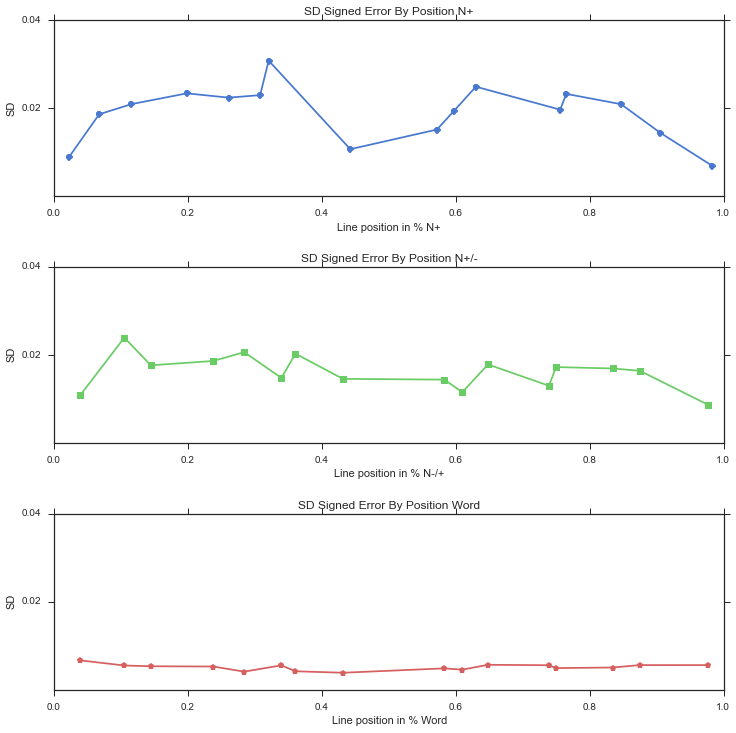

In [110]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(median_scores['N+'], sd_medians['N+'], 'o-', color=pal[0])
plt.title('SD Signed Error By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.04])
plt.yticks(([0.02,0.04]))

fig2 = plt.subplot(3,1,2)
fig2.plot(median_scores['N-/+'], sd_medians['N-/+'], color=pal[1], marker='s')
plt.title('SD Signed Error By Position N+/-')
plt.xlabel('Line position in % N-/+', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.04])
plt.yticks(([0.02,0.04]))

fig3 = plt.subplot(3,1,3)
fig3.plot(median_scores['N-/+'], sd_medians['Word'], color=pal[2], marker='p')
plt.title('SD Signed Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.04])
plt.yticks(([0.02,0.04]))

plt.subplots_adjust(hspace=.4)

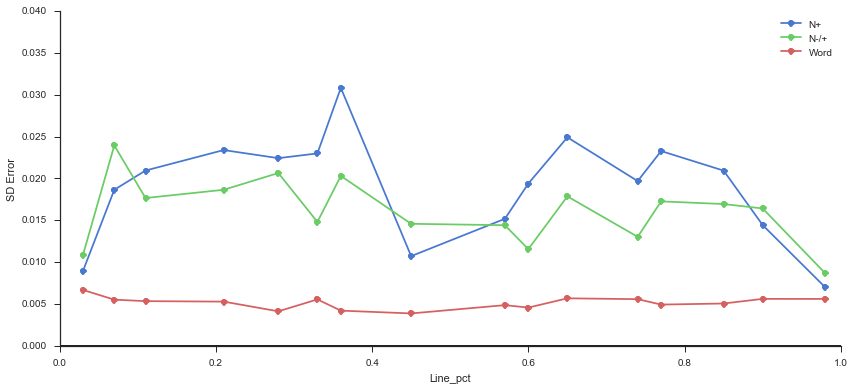

In [111]:
plt.figure(figsize=(14,6))
for key,grp in sd_df.groupby('Task'):
    print 
    plt.plot(grp.Line_pct.unique(),grp.groupby('Line_pct')['Error'].median(),'-o',label=key)
plt.axhline(y=0,color='black')
plt.legend(loc = 'best')
plt.ylim([0,0.04])
plt.xlabel('Line_pct')
plt.ylabel('SD Error')
sns.despine(trim=True)

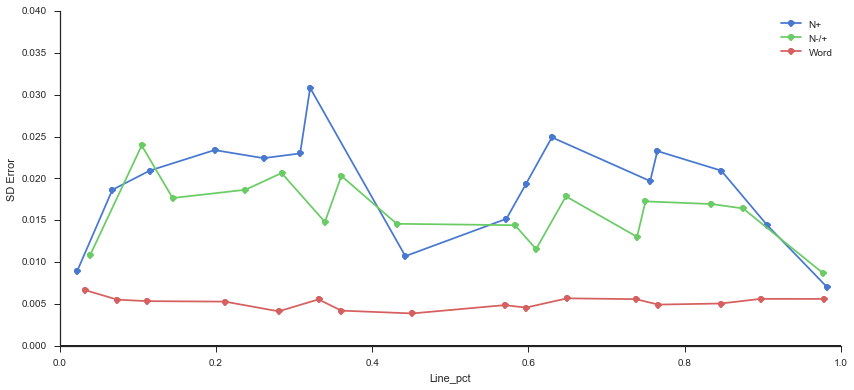

In [112]:
plt.figure(figsize=(14,6))
for key,grp in sd_df.groupby('Task'):
    print 
    plt.plot(median_scores[key],grp.groupby('Line_pct')['Error'].median(),'-o',label=key)
plt.axhline(y=0,color='black')
plt.legend(loc = 'best')
plt.ylim([0,0.04])
plt.xlabel('Line_pct')
plt.ylabel('SD Error')
sns.despine(trim=True)

## Landmark Vs. MAE

In [113]:
plt_df.loc[:,'dist0'] = plt_df.Line_pct

In [114]:
plt_df.loc[:,'dist50'] = abs(plt_df.dist0 - 0.5)

In [115]:
plt_df.loc[:,'dist100'] = abs(plt_df.dist0 - 1)

In [116]:
plt_df.loc[:,'distLand'] = plt_df[['dist0','dist50','dist100']].min(1)

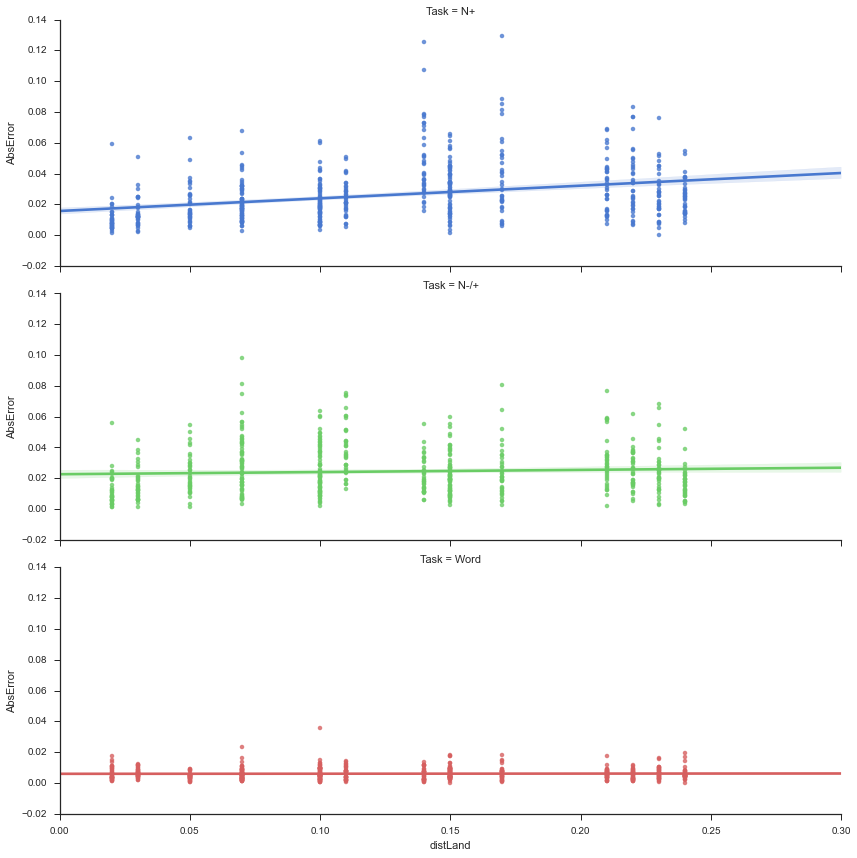

In [117]:
g = sns.lmplot(x='distLand',y='AbsError',hue='Task',row='Task',data=plt_df,size=4,aspect=3)

This is the same result as the other notebook but shows the difference in size of outliers to central tendency as reflected by the median calculated at each landmark distance.

## Landmark distance Vs signed error

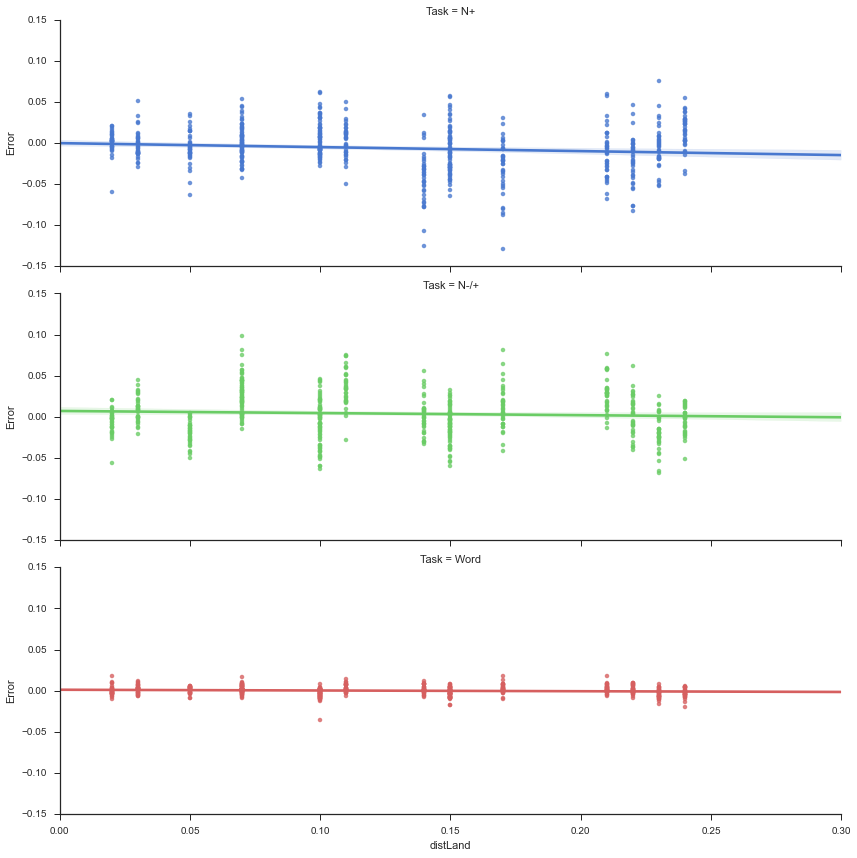

In [118]:
g = sns.lmplot(x='distLand',y='Error',hue='Task',row='Task',data=plt_df,size=4,aspect=3)

## Math Score and MAE

In [119]:
math = pd.read_csv('MathScores.csv')

In [120]:
plt_df = pd.merge(plt_df,math,on='Subject',how='inner')

In [121]:
sat_df = plt_df.groupby(['Task', 'Subject']).mean()

In [122]:
sat_df.to_csv('plot_data_SAT.csv', sep='\t')
sat_df = pd.read_csv('plot_data_SAT.csv',sep='\t')

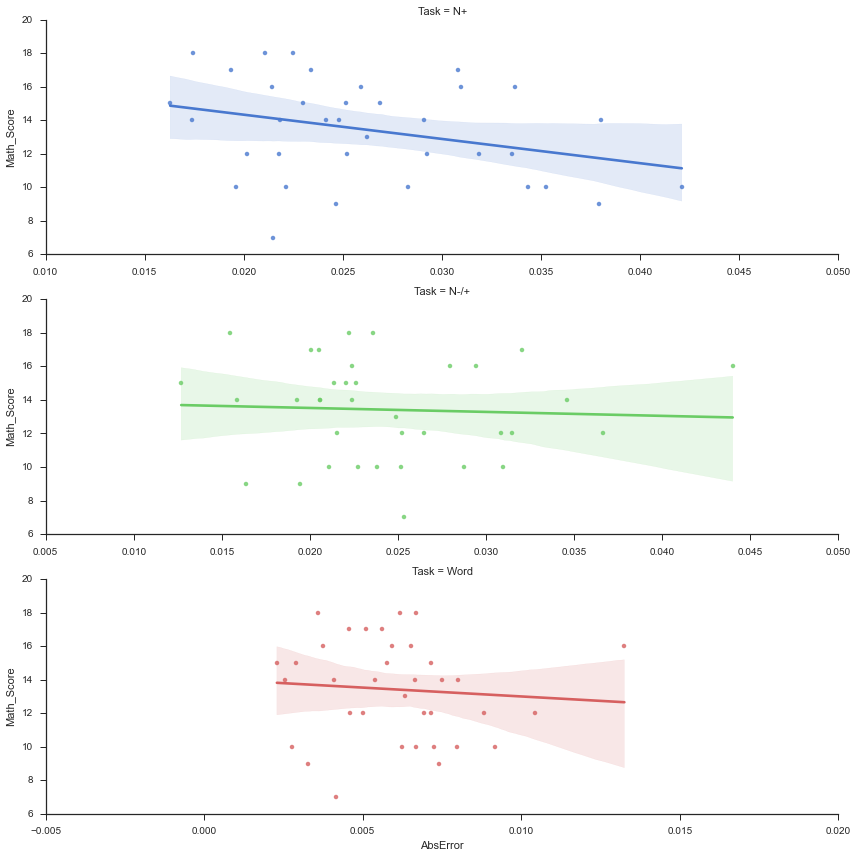

In [123]:
g = sns.lmplot(x='AbsError',y='Math_Score',hue='Task',row='Task',data=sat_df,size=4,aspect=3,sharex=False,truncate=True)

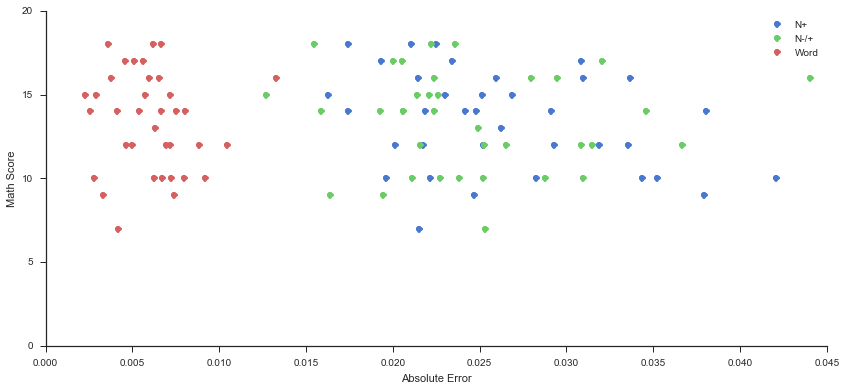

In [124]:
plt.figure(figsize=(14,6))
for key,grp in sat_df.groupby('Task'):
    plt.plot(grp.AbsError,grp.Math_Score,'o',label=key)
plt.legend(loc = 'best')
plt.ylim([0,20])
plt.xlabel('Absolute Error')
plt.ylabel('Math Score')
sns.despine(trim=True)

## Signed Error vs SAT

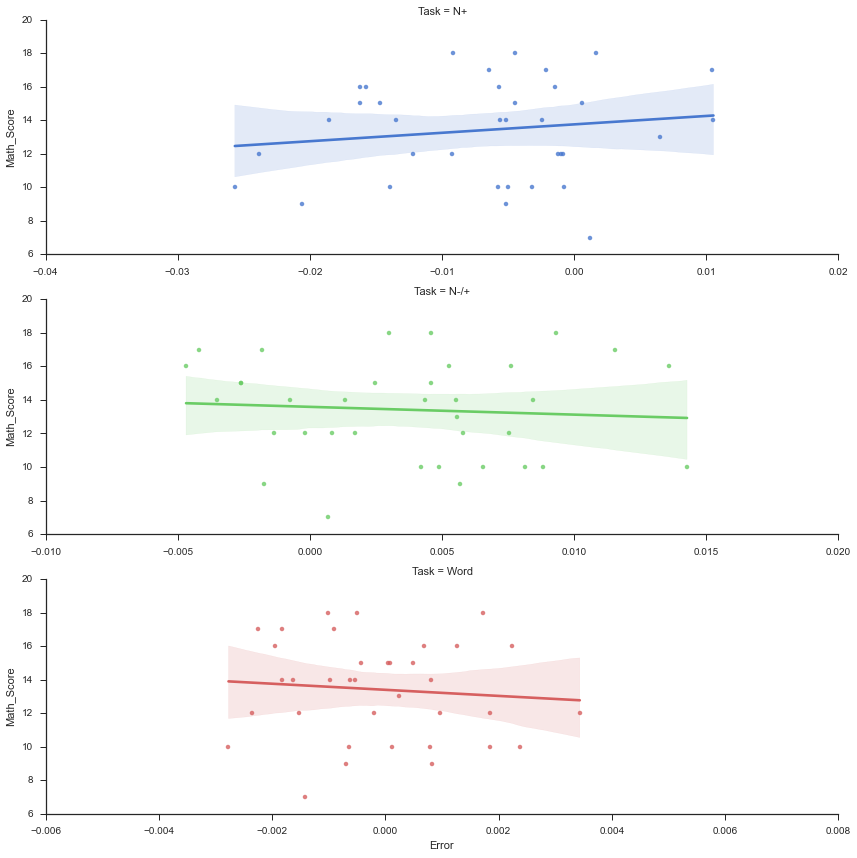

In [125]:
g = sns.lmplot(x='Error',y='Math_Score',hue='Task',row='Task',data=sat_df,size=4,aspect=3,sharex=False,truncate=True)

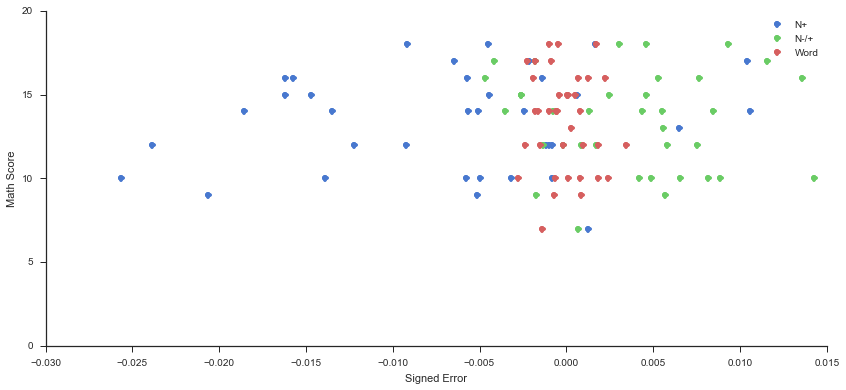

In [126]:
plt.figure(figsize=(14,6))
for key,grp in sat_df.groupby('Task'):
    plt.plot(grp.Error,grp.Math_Score,'o',label=key)
plt.legend(loc = 'best')
plt.ylim([0,20])
plt.xlabel('Signed Error')
plt.ylabel('Math Score')
sns.despine(trim=True)